<h1> Interactive Data Analysis </h1>

This notebook introduces carrying out interactive data analysis of data in BigQuery using Notebook.

<h2> What's installed? </h2>

In [ ]:
# !pip freeze

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# Load bigquery magic command
%load_ext google.cloud.bigquery

<h2> Installing dependencies </h2>

If there is any dependency need to be installed. It is possible to install the dependency directly from notebook. However, it is recommended to check with your team members that maintain the notebook service.

In [ ]:
# !pip install google-cloud

In [ ]:
# %bash
# apt-get update
# apt-get -y install python-mpltoolkits.basemap

<h2> Juypter magic </h2>

Here are just some examples how the jupyter magic command can be used.

In [4]:
# Run bq command directly in notebook
! bq show --schema --format=prettyjson workshop-trvlk:events.flights_perf_nopartition

[
  {
    "mode": "NULLABLE", 
    "name": "FL_DATE", 
    "type": "DATE"
  }, 
  {
    "mode": "NULLABLE", 
    "name": "UNIQUE_CARRIER", 
    "type": "STRING"
  }, 
  {
    "mode": "NULLABLE", 
    "name": "AIRLINE_ID", 
    "type": "INTEGER"
  }, 
  {
    "mode": "NULLABLE", 
    "name": "CARRIER", 
    "type": "STRING"
  }, 
  {
    "mode": "NULLABLE", 
    "name": "FL_NUM", 
    "type": "INTEGER"
  }, 
  {
    "mode": "NULLABLE", 
    "name": "ORIGIN_AIRPORT_ID", 
    "type": "INTEGER"
  }, 
  {
    "mode": "NULLABLE", 
    "name": "ORIGIN_AIRPORT_SEQ_ID", 
    "type": "INTEGER"
  }, 
  {
    "mode": "NULLABLE", 
    "name": "ORIGIN_CITY_MARKET_ID", 
    "type": "INTEGER"
  }, 
  {
    "mode": "NULLABLE", 
    "name": "ORIGIN", 
    "type": "STRING"
  }, 
  {
    "mode": "NULLABLE", 
    "name": "DEST_AIRPORT_ID", 
    "type": "INTEGER"
  }, 
  {
    "mode": "NULLABLE", 
    "name": "DEST_AIRPORT_SEQ_ID", 
    "type": "INTEGER"
  }, 
  {
    "mode": "NULLABLE", 
    "name": "DEST_

In [11]:
%%html
This cell will print out a <b> HTML </b> string.

In [10]:
%%bigquery

SELECT
 *
FROM
 `workshop-trvlk.events.INFORMATION_SCHEMA.COLUMNS`
WHERE
 table_name="flights_perf_partition"

,table_catalog,table_schema,table_name,column_name,ordinal_position,is_nullable,data_type,is_generated,generation_expression,is_stored,is_hidden,is_updatable,is_system_defined,is_partitioning_column,clustering_ordinal_position
0,workshop-trvlk,events,flights_perf_partition,FL_DATE,1,YES,DATE,NEVER,None,None,NO,None,NO,YES,None
1,workshop-trvlk,events,flights_perf_partition,UNIQUE_CARRIER,2,YES,STRING,NEVER,None,None,NO,None,NO,NO,None
2,workshop-trvlk,events,flights_perf_partition,AIRLINE_ID,3,YES,STRING,NEVER,None,None,NO,None,NO,NO,None
3,workshop-trvlk,events,flights_perf_partition,CARRIER,4,YES,STRING,NEVER,None,None,NO,None,NO,NO,None
4,workshop-trvlk,events,flights_perf_partition,FL_NUM,5,YES,STRING,NEVER,None,None,NO,None,NO,NO,None
5,workshop-trvlk,events,flights_perf_partition,ORIGIN_AIRPORT_ID,6,YES,STRING,NEVER,None,None,NO,None,NO,NO,None
6,workshop-trvlk,events,flights_perf_partition,ORIGIN_AIRPORT_SEQ_ID,7,YES,INT64,NEVER,None,None,NO,None,NO,NO,None
7,workshop-trvlk,events,flights_perf_partition,ORIGIN_CITY_MARKET_ID,8,YES,STRING,NEVER,None,None,NO,None,NO,NO,None
8,workshop-trvlk,events,flights_perf_partition,ORIGIN,9,YES,STRING,NEVER,None,None,NO,None,NO,NO,None
9,workshop-trvlk,events,flights_perf_partition,DEST_AIRPORT_ID,10,YES,STRING,NEVER,None,None,NO,None,NO,NO,None


<h2> Let's start to take a look at the data </h2>

Take a sample of 100 records, and look at the data

In [11]:
%%bigquery df --verbose

SELECT 
    *
FROM 
    `workshop-trvlk.events.flights_perf_nopartition`
LIMIT 100

Executing query with job ID: 5bfe3582-5558-45c8-935e-b9eeb9610129
Query executing: 1.36s
Query complete after 2.18s


In [12]:
# Note the above convenient syntax sugar, which will save the result to pandas DataFrame "df"
df.head()

,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,DEST_AIRPORT_ID,...,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,DISTANCE
0,2015-12-04,AS,19930,AS,62,10299,1029904,30299,ANC,12523,...,810,930.0,5.0,938,935.0,-3.0,0.0,None,0.0,571.0
1,2015-06-04,WN,19393,WN,4479,12391,1239102,31703,ISP,14027,...,1457,1724.0,5.0,1740,1729.0,-11.0,0.0,None,0.0,1052.0
2,2014-06-03,AS,19930,AS,50,14709,1470903,30073,SCC,10754,...,1738,1813.0,7.0,1800,1820.0,20.0,0.0,None,0.0,204.0
3,2015-01-03,EV,20366,EV,2571,13241,1324102,33241,MEI,14109,...,2133,2148.0,9.0,2130,2157.0,27.0,0.0,None,0.0,69.0
4,2011-05-01,AA,19805,AA,1312,14843,1484302,34819,SJU,10529,...,1825,2201.0,5.0,2225,2206.0,-19.0,0.0,None,0.0,1666.0


**This following demonstration follows the flow used in Chapter 5 of book "Data Science on the Google Cloud Platform"**

## Arrival delay v.s. Departure delay

Pull the arrival delays corresponding to the model created in Chapter 3, i.e., of the
arrival delay for flights that depart more than 10 minutes late.

In [13]:
%%bigquery df --verbose

SELECT 
    ARR_DELAY, DEP_DELAY
FROM 
    `workshop-trvlk.events.flights_perf_nopartition`
WHERE 
    FL_DATE >= "2015-01-01" AND DEP_DELAY >= 10 AND RAND() < 0.01

Executing query with job ID: 061d5f0b-680a-41c5-b0d5-73e50222af2e
Query executing: 1.44s
Query complete after 2.61s


In [14]:
df.describe()

,ARR_DELAY,DEP_DELAY
count,24648.000000,24778.000000
mean,47.707562,52.662806
std,66.819052,65.056156
min,-54.000000,10.000000
25%,11.000000,17.000000
50%,27.000000,31.000000
75%,61.000000,62.000000
max,1495.000000,1456.000000


### Violin plot of arrival delay

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


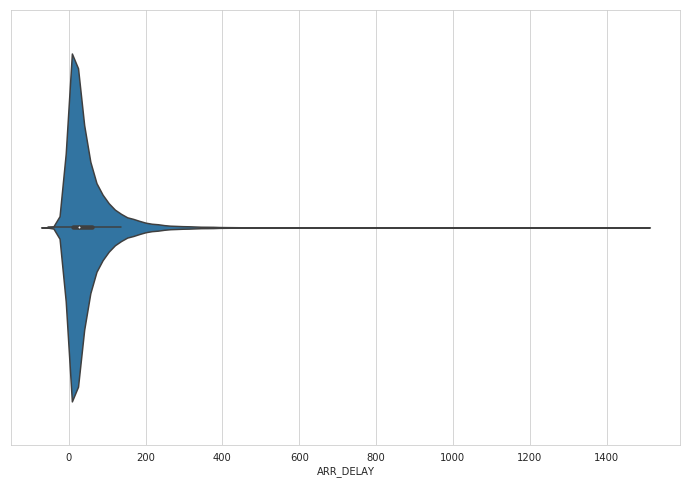

In [15]:
fig, axs = plt.subplots(figsize=(12,8))
sns.violinplot(data=df, x='ARR_DELAY', inner='box', orient='h', ax=axs)

Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator. Typically a violin plot will include all the data that is in a box plot: a marker for the median of the data; a box or marker indicating the interquartile range; and possibly all sample points, if the number of samples is not too high.

So a violin plot is more informative than a plain box plot. While a box plot only shows summary statistics such as mean/median and interquartile ranges, the violin plot shows the full distribution of the data. The difference is particularly useful when the data distribution is multimodal (more than one peak). In this case a violin plot shows the presence of different peaks, their position and relative amplitude.

**Let’s compare the violin plot for flights that depart more than 10 minutes late with the violin plot for flights that depart less than 10 minutes late and zoom in on the x-axis close to our 15-minute threshold.**

In [16]:
%%bigquery df --verbose

SELECT 
    ARR_DELAY, DEP_DELAY
FROM 
    `workshop-trvlk.events.flights_perf_nopartition`
WHERE 
    FL_DATE >= "2015-01-01" AND RAND() < 0.001

Executing query with job ID: ba6914cc-1d19-4f91-bad1-5083e2f19a43
Query executing: 1.40s
Query complete after 2.26s


In [17]:
df.describe()

,ARR_DELAY,DEP_DELAY
count,11342.000000,11373.000000
mean,3.906630,9.074650
std,38.687211,36.240692
min,-81.000000,-29.000000
25%,-14.000000,-5.000000
50%,-5.000000,-2.000000
75%,7.000000,7.000000
max,819.000000,792.000000


In [18]:
df['ontime'] = df['DEP_DELAY'] < 10
df[df['ARR_DELAY'] > 0].head()

,ARR_DELAY,DEP_DELAY,ontime
0,17.0,12.0,False
4,28.0,31.0,False
12,16.0,13.0,False
22,6.0,-1.0,True
24,8.0,13.0,False


(-50, 200)

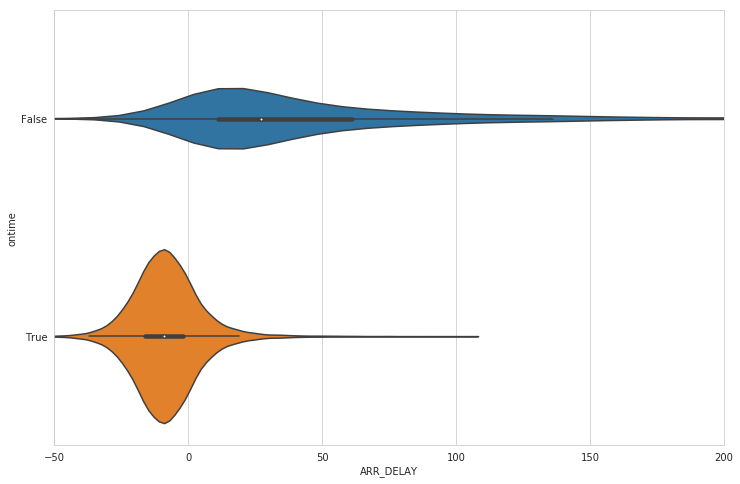

In [19]:
fig, axs = plt.subplots(figsize=(12,8))
sns.violinplot(data=df, x='ARR_DELAY', y='ontime', inner='box', orient='h', ax=axs)
axs.set_xlim(-50, 200)

(-50, 50)

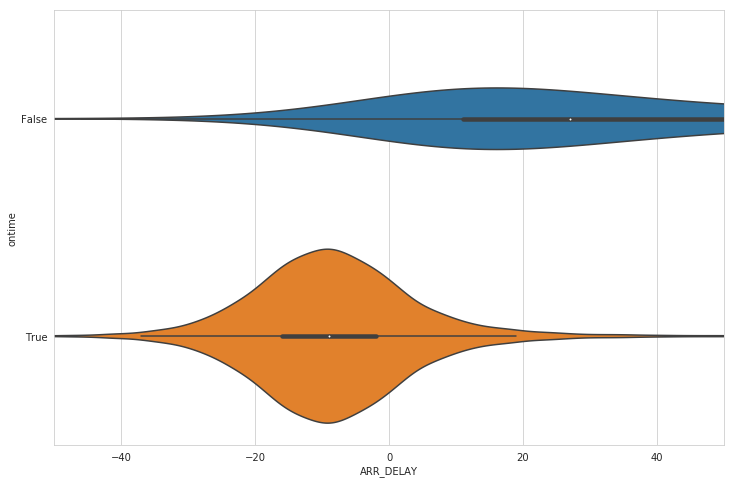

In [20]:
fig, axs = plt.subplots(figsize=(12,8))
sns.violinplot(data=df, x='ARR_DELAY', y='ontime', 
                    inner='box', orient='h', gridsize=1000, ax=axs)
axs.set_xlim(-50, 50)

### observation
It is clear that the 10-minute threshold separates the dataset into two separate statistical regimes, so that the typical arrival delay for flights that depart more than 10 minutes late is skewed toward much higher values than for flights that depart more on time.

**However, the extremely long skinny tail of the violin plot is a red flag—it is an indication that the dataset might pose modeling challenges. Let’s investigate what is going on.**

## Average arrival delay 
In this we are going to investigate the average arrival delay associated with every value of departure delay

In [21]:
%%bigquery result --verbose

SELECT
    AVG(ARR_DELAY) AS arrival_delay
FROM
    `workshop-trvlk.events.flights_perf_nopartition`
WHERE
    FL_DATE >= "2015-01-01"
GROUP BY
    DEP_DELAY
ORDER BY
    DEP_DELAY

Executing query with job ID: a31840dd-b08b-4b8e-a071-39ecf24767bc
Query executing: 1.49s
Query complete after 2.34s


In [22]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1423 entries, 0 to 1422
Data columns (total 1 columns):
arrival_delay    1419 non-null float64
dtypes: float64(1)
memory usage: 11.2 KB


**I get back more than 1,000 rows. Are there really more than 1,000 unique values of DEP_DELAY**

In [23]:
%%bigquery result --verbose

SELECT
    DEP_DELAY,
    AVG(ARR_DELAY) AS arrival_delay,
    COUNT(ARR_DELAY) AS numflights
FROM
    `workshop-trvlk.events.flights_perf_nopartition`
WHERE
    FL_DATE >= "2015-01-01"
GROUP BY
    DEP_DELAY
ORDER BY
    DEP_DELAY

Executing query with job ID: f6305182-d814-4f7a-ac83-a0d88653a5ca
Query executing: 1.39s
Query complete after 2.48s


In [24]:
result[:5]

,DEP_DELAY,arrival_delay,numflights
0,NaN,NaN,0
1,-204.0,-119.0,1
2,-149.0,-152.0,1
3,-91.0,-91.0,1
4,-82.0,-48.5,2


In [25]:
result.describe()

,DEP_DELAY,arrival_delay,numflights
count,1422.000000,1419.000000,1423.000000
mean,656.194796,652.280598,7907.345748
std,438.025577,438.434185,61420.491596
min,-204.000000,-152.000000,0.000000
25%,286.250000,282.492968,4.000000
50%,641.500000,634.285714,11.000000
75%,996.750000,990.525000,180.000000
max,2149.000000,2142.000000,905616.000000


### Obervation
Oddball values that are such a small proportion of the data can probably be ignored.
Moreover, if the flight does really leave 82 plus minutes early, I’m quite sure that you won’t
be on the flight, and if you are, you know that you will make the meeting. There is no
reason to complicate our statistical modeling with such odd values.

### Remove outlier and continue analysis

In [26]:
%%bigquery depdelay --verbose

SELECT
  *
FROM (
  SELECT
    DEP_DELAY,
    AVG(ARR_DELAY) AS arrival_delay,
    STDDEV(ARR_DELAY) AS stddev_arrival_delay,
    COUNT(ARR_DELAY) AS numflights
  FROM
    `workshop-trvlk.events.flights_perf_nopartition`
  WHERE
    FL_DATE >= "2015-01-01"
  GROUP BY
    DEP_DELAY )
WHERE
  numflights > 370
ORDER BY
  DEP_DELAY

Executing query with job ID: c8db0311-8d6f-4ff2-a818-9bf1fc6d75d4
Query executing: 2.09s
Query complete after 2.66s


In [27]:
depdelay[:5]

,DEP_DELAY,arrival_delay,stddev_arrival_delay,numflights
0,-26.0,-24.311518,11.610468,382
1,-25.0,-25.083183,10.550274,553
2,-24.0,-23.856574,11.514706,753
3,-23.0,-23.888340,10.939289,1012
4,-22.0,-23.410203,11.766737,1431


In [28]:
depdelay.describe()

,DEP_DELAY,arrival_delay,stddev_arrival_delay,numflights
count,294.000000,294.000000,294.000000,294.000000
mean,120.540816,116.666960,17.049226,38152.292517
std,85.084439,85.322574,2.511604,130964.985176
min,-26.000000,-25.083183,10.550274,379.000000
25%,47.250000,42.535461,15.928406,1005.250000
50%,120.500000,117.374383,17.508452,3122.000000
75%,193.750000,190.699956,18.687370,13171.500000
max,270.000000,265.718670,23.073901,905616.000000


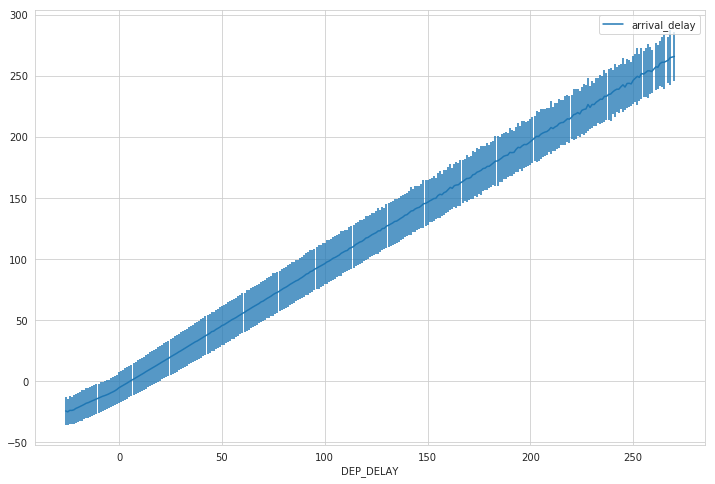

In [29]:
fig, axs = plt.subplots(figsize=(12,8))
depdelay.plot(kind='line', x='DEP_DELAY', 
              y='arrival_delay', yerr='stddev_arrival_delay', ax=axs)

It certainly does appear as if the relationship between departure delay and arrival
delay is quite linear. The width of the standard deviation of the arrival delay is also
pretty constant, on the order of 10 minutes.

## Cancelation Model

### Applying probabilistic decision threshold

If the plane is more than 30% likely to be delayed (on arrival) by more than 15 minutes, we want to send a text message asking to postpone the meeting

Text(0,0.5,'> 30% likelihood of this Arrival Delay (minutes)')

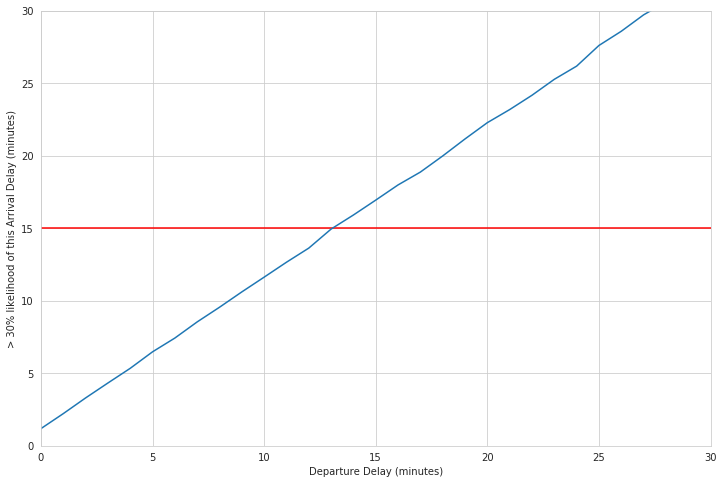

In [30]:
# Compute the 30% threshold for each departure delay
Z_30 = 0.52
depdelay['arr_delay_30'] = (Z_30 * depdelay['stddev_arrival_delay']) \
             + depdelay['arrival_delay']

fig, axs = plt.subplots(figsize=(12,8))
axs.axhline(y=15, color='r')
depdelay.plot(kind='line', x='DEP_DELAY', y='arr_delay_30',
              ax=axs, ylim=(0,30), xlim=(0,30), legend=False)
axs.set_xlabel('Departure Delay (minutes)')
axs.set_ylabel('> 30% likelihood of this Arrival Delay (minutes)')

It appears that your decision criterion translates to a departure delay of 13 minutes. If
your departure delay is 13 minutes or more, you are more than 30% likely to be
delayed by 15 minutes or more.

### Empirical Probability Distribution Function

In [102]:
%%bigquery depdelay --verbose

SELECT
  DEP_DELAY,
  arrival_delay,
  numflights
FROM (
  SELECT
    DEP_DELAY,
    APPROX_QUANTILES(ARR_DELAY,
      101)[OFFSET(70)] AS arrival_delay,
    COUNT(ARR_DELAY) AS numflights
  FROM
    `workshop-trvlk.events.flights_perf_nopartition`
  WHERE
    FL_DATE >= "2015-01-01"
  GROUP BY
    DEP_DELAY )
WHERE
  numflights > 370
ORDER BY
  DEP_DELAY

Executing query with job ID: 362d04e3-d993-4a3a-9043-e4bc1f63d895
Query executing: 0.42s
Query complete after 0.77s


Text(0, 0.5, '> 30% likelihood of this Arrival Delay (minutes)')

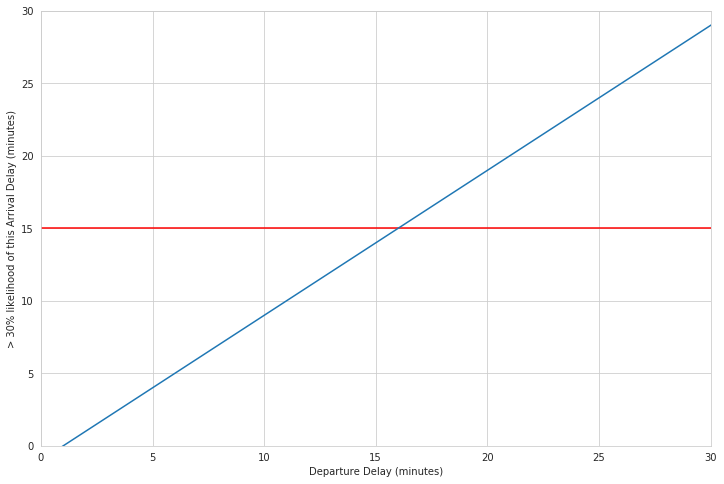

In [103]:
fig, axs = plt.subplots(figsize=(12,8))

axs.axhline(y=15, color='r')
depdelay.plot(kind='line', x='DEP_DELAY', y='arrival_delay',
              ax=axs, ylim=(0,30), xlim=(0,30), legend=False)
axs.set_xlabel('Departure Delay (minutes)')
axs.set_ylabel('> 30% likelihood of this Arrival Delay (minutes)')

Your decision threshold, without the assumption of
normal distribution, is 16 minutes. If your flight is delayed by more than 16 minutes,
there is a greater than 30% likelihood that you will arrive more than 15 minutes late.

### Evaluating the model

Split the data into two parts. Create the model on the first part (called the training set), and evaluate it on the second part (called the test set).

The approach that we will take is to find all the unique days in the dataset, shuffle
them, and use 70% of these days as the training set and the remainder as the test set.
For repeatability, I will store this division as a table in BigQuery

In [104]:
%%bigquery depdelay --verbose
    
SELECT
  DEP_DELAY,
  arrival_delay,
  numflights
FROM (
  SELECT
    DEP_DELAY,
    APPROX_QUANTILES(ARR_DELAY,
      101)[OFFSET(70)] AS arrival_delay,
    COUNT(ARR_DELAY) AS numflights
  FROM
    `events.flights_perf_nopartition` f
  JOIN
    `events.trainday` t
  ON
    f.FL_DATE = t.FL_DATE
  WHERE
    t.is_train_day = 'True' AND f.FL_DATE >= "2015-01-01"
  GROUP BY
    DEP_DELAY )
WHERE
  numflights > 370
ORDER BY
  DEP_DELAY

Executing query with job ID: 11e4a803-b91f-40d2-873a-a434b06012c7
Query executing: 0.35s
Query complete after 0.77s


Text(0, 0.5, '> 30% likelihood of this Arrival Delay (minutes)')

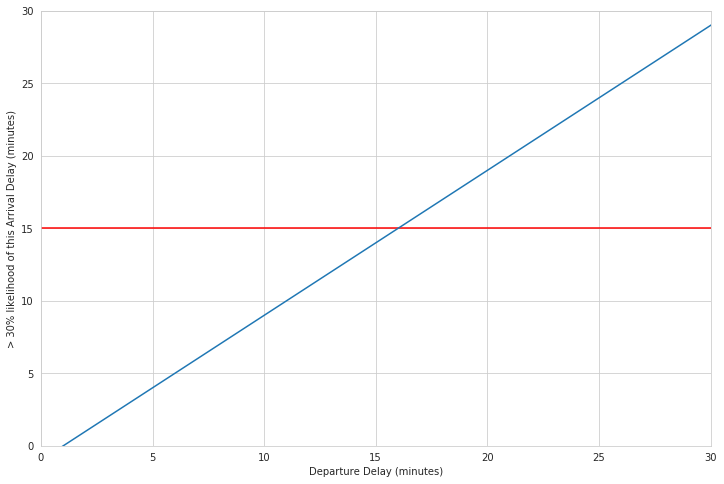

In [105]:
fig, axs = plt.subplots(figsize=(12,8))
axs.axhline(y=15, color='r')
depdelay.plot(kind='line', x='DEP_DELAY', y='arrival_delay',
              ax=axs, ylim=(0,30), xlim=(0,30), legend=False)
axs.set_xlabel('Departure Delay (minutes)')
axs.set_ylabel('> 30% likelihood of this Arrival Delay (minutes)')

In [106]:
%%bigquery eval --verbose

SELECT
  SUM(IF(DEP_DELAY < 16
      AND arr_delay < 15, 1, 0)) AS correct_nocancel,
  SUM(IF(DEP_DELAY < 16
      AND arr_delay >= 15, 1, 0)) AS wrong_nocancel,
  SUM(IF(DEP_DELAY >= 16
      AND arr_delay < 15, 1, 0)) AS wrong_cancel,
  SUM(IF(DEP_DELAY >= 16
      AND arr_delay >= 15, 1, 0)) AS correct_cancel
FROM (
  SELECT
    DEP_DELAY,
    ARR_DELAY
  FROM
    `events.flights_perf_nopartition` f
  JOIN
    `events.trainday` t
  ON
    f.FL_DATE = t.FL_DATE
  WHERE
    t.is_train_day = 'False' AND f.FL_DATE >= "2015-01-01" )

Executing query with job ID: 603c982d-f8f8-4af4-8d0e-71e139491767
Query executing: 0.34s
Query complete after 0.72s


In [107]:
print(eval['correct_nocancel'] / (eval['correct_nocancel'] + eval['wrong_nocancel']))
print(eval['correct_cancel'] / (eval['correct_cancel'] + eval['wrong_cancel']))

0    0.951328
dtype: float64
0    0.812219
dtype: float64


In [108]:
eval.head()

,correct_nocancel,wrong_nocancel,wrong_cancel,correct_cancel
0,2681636,137199,107436,464698


It turns out when I recommend that you not cancel your meeting, I will be correct
95% of the time, and when I recommend that you cancel your meeting, I will be correct
80% of the time.

Why is this not 70%? Because the populations are different. In creating the model, we
found the 70th percentile of arrival delay given a specific departure delay. In evaluating
the model, we looked at the dataset of all flights

In [111]:
%%bigquery eval --verbose

SELECT
  SUM(IF(DEP_DELAY = 15
      AND arr_delay < 15, 1, 0)) AS correct_nocancel,
  SUM(IF(DEP_DELAY = 15
      AND arr_delay >= 15, 1, 0)) AS wrong_nocancel,
  SUM(IF(DEP_DELAY = 16
      AND arr_delay < 15, 1, 0)) AS wrong_cancel,
  SUM(IF(DEP_DELAY = 16
      AND arr_delay >= 15, 1, 0)) AS correct_cancel
FROM (
  SELECT
    DEP_DELAY,
    ARR_DELAY
  FROM
    `events.flights_perf_nopartition` f
  JOIN
    `events.trainday` t
  ON
    f.FL_DATE = t.FL_DATE
  WHERE
    t.is_train_day = 'False' AND f.FL_DATE >= "2015-01-01" )

Executing query with job ID: 6c69f4bc-bc56-4977-8106-db6db94110b8
Query executing: 0.34s
Query complete after 0.79s


In [112]:
eval.head()

,correct_nocancel,wrong_nocancel,wrong_cancel,correct_cancel
0,15633,5933,13644,5974


In [113]:
print(eval['correct_nocancel'] / (eval['correct_nocancel'] + eval['wrong_nocancel']))
print(eval['correct_cancel'] / (eval['correct_cancel'] + eval['wrong_cancel']))

0    0.724891
dtype: float64
0    0.304516
dtype: float64
